# Image histogram manipulation


An image histogram is a distribution of pixels across varying pixel brightness values.       
In an all black 10x10 image, the histogram will have a peak value of 100 at 0 - because we have 100 pixels and all their values are 0.  

In a low-contrast image, all the pixels are grouped around some value, let's say 100 $\pm$ 10. That means the lowest dark brightness value is 90 and highest 110.        
That's not all that dark nor that bright, ergo why we don't percieve the contrast.

Another way in which histograms, come in especially useful is in foreground/backgroud separation or visualizing signal from noise separation. An image of a building, for example, against a bright sunny sky will obviously have a relatively large values of brightness for the sky pixels, while the building itself - apart from a window reflection or two - would occupy low-to-mid range brightness values.  

As we're about to see, because of the nature of sattelite trails and instrumentation we use in astronomy, we can use this to our advantage.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [3]:
# make the plots bigger
plt.rcParams["figure.figsize"] = (10,10)

In [141]:
def open_image(imgpath, mode=cv2.IMREAD_GRAYSCALE):
    """
    Open an image as an numpy array.
    
    Parameters
    ----------
    imgpath : `str`
        Path to the image.
    mode : `int`, optional
        Mode with which to open the image, i.e. color vs black and white.
        Must be one of the OpenCV recognized constants such as 
        `cv2.IMREAD_GRAYSCALE` or `cv2.IMREAD_COLOR`
        
    Returns
    --------
    img : `np.array`
        Image.
        
    Raises
    ------
    OSError - when the file could not be opened.
    """
    img = cv2.imread(imgpath, mode)
    if img is None:
        raise OSError("Can't open file:", imgpath)
    else:
        return img

def show(img, ax=None, show=True, title=None, **kwargs):
    """
    Show image using matplotlib.
    
    Parameters
    ----------
    img : `np.array`
        Image to display.
    ax : `matplotlib.pyplot.Axes` or `None`, optional
        Ax on which to plot the image. If  no axis is given
        a new figure is created.
    kwargs : `dict`, optional
        Keyword arguments that are passed to `imshow`.
    """
    if ax is None:
        fig, ax = plt.subplots()
        
    ax.imshow(img, **kwargs)
    ax.set_title(title, fontsize=22)
    return ax

Let's make a helper function to plot a histogram using Matplotlib

In [140]:
def plot_hist(img):
    """Plot a histogram of an image. """
    plt.hist(img.ravel(), bins=255)
    plt.xlabel("Brightness level [0-255]")
    plt.ylabel("Pixel count")
    plt.show()

Let's finally take a look at our image and it's histogram. 

<AxesSubplot:>

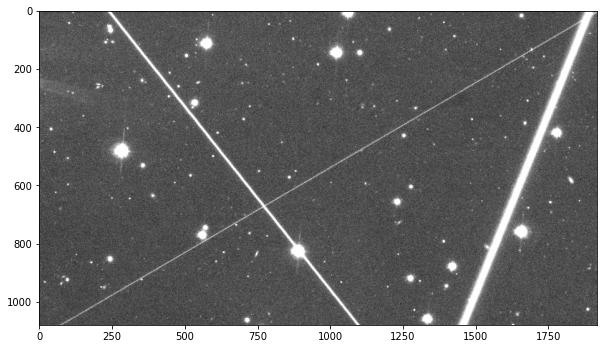

In [133]:
img = open_image("images/vatt_2021b.png")
show(img, cmap="gray") 

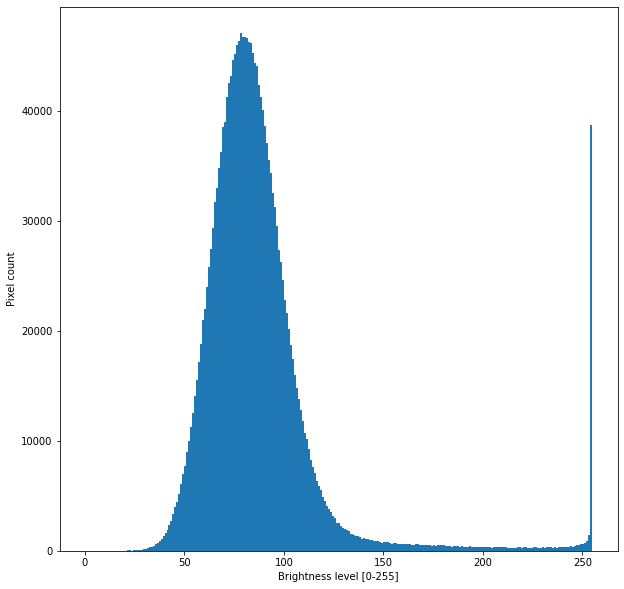

In [24]:
plot_hist(img)

What does this histogram tell us about the image? 

How can we use that to our advantage?

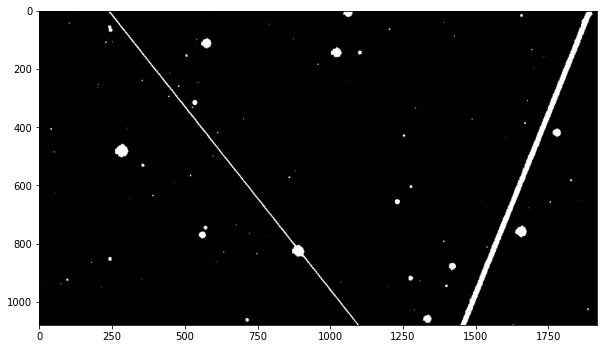

In [41]:
test = img.copy()
test[test<254] = 0
show(test, cmap="gray")

But what did we really do here?

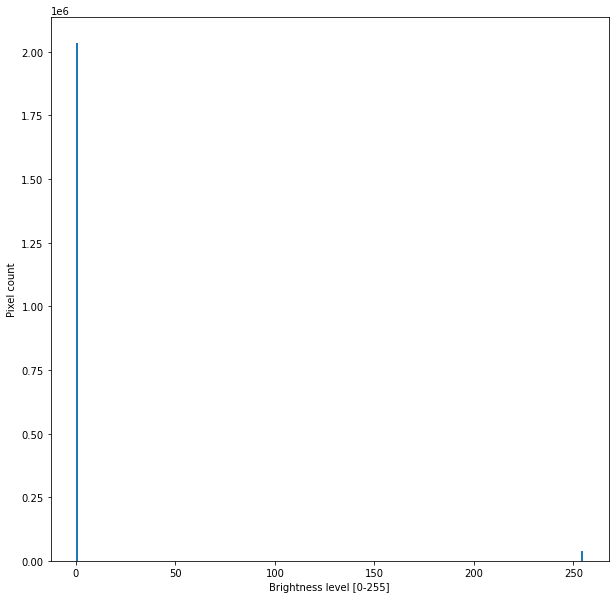

In [43]:
plot_hist(test)

## Tresholding

What we just did was called tresholding. OpenCV has a long and nice example of the kinds of things tresholding can do for you:            
https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

which I just showcase here very briefly:

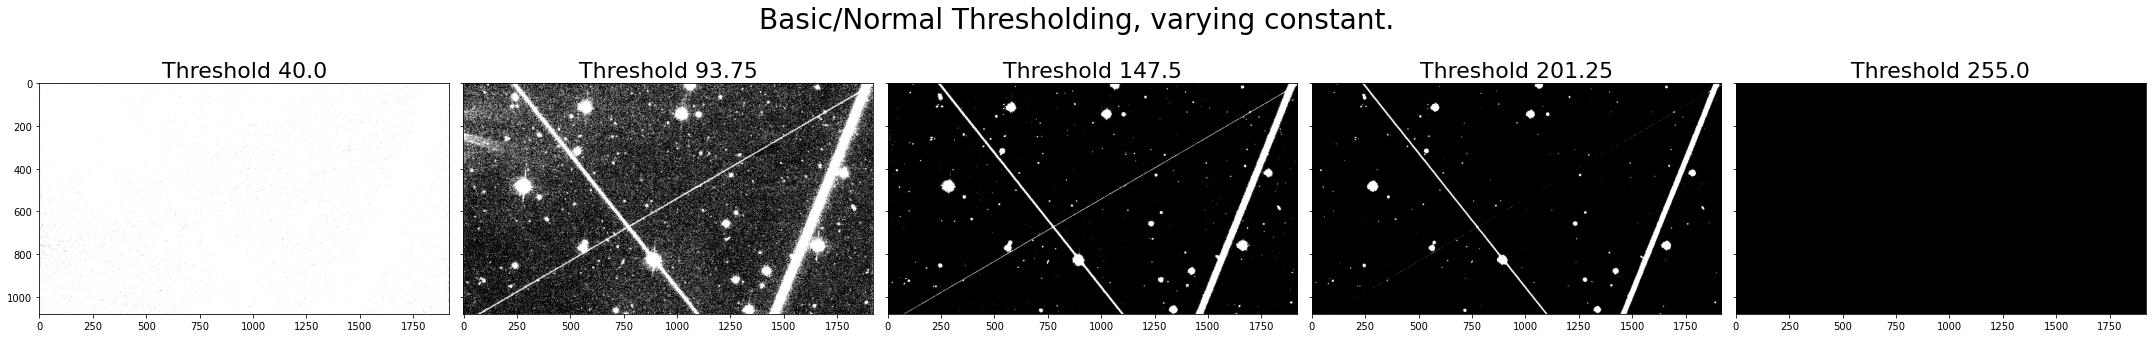

In [144]:
# Adaptive thresholding by mean value, first by kernel size.
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(30, 5))
thresholds = np.linspace(40, 255, 5)
for ax, i in zip(axes.ravel(), thresholds):
    ret, th = cv2.threshold(img, i, 255, cv2.THRESH_BINARY)
    show(th, ax=ax, cmap="gray", title=f"Threshold {i}")
fig.suptitle("Basic/Normal Thresholding, varying constant.", fontsize=28)
plt.tight_layout()
plt.show()

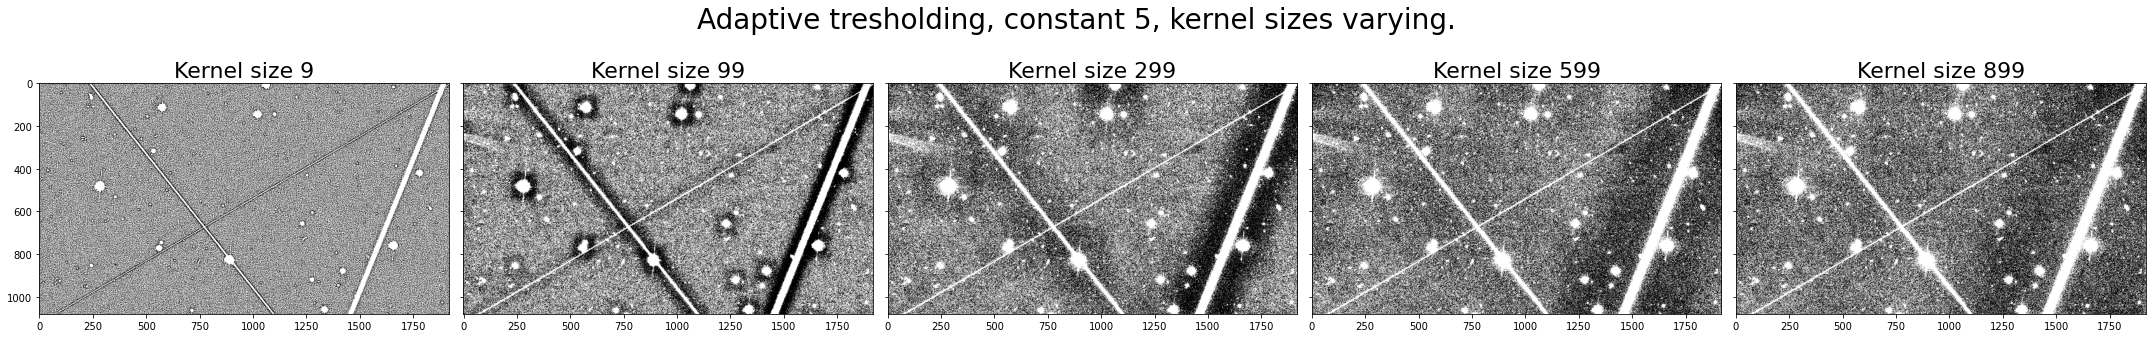

In [145]:
# Adaptive thresholding by mean value, first by kernel size.
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(30, 5))
kernel_sizes = [9, 99, 299, 599, 899]
for ax, i in zip(axes.ravel(), kernel_sizes):
    th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, i, 5)
    show(th2, ax=ax, cmap="gray", title=f"Kernel size {i}")
fig.suptitle("Adaptive tresholding, constant 5, kernel sizes varying.", fontsize=28)
plt.tight_layout()
plt.show()

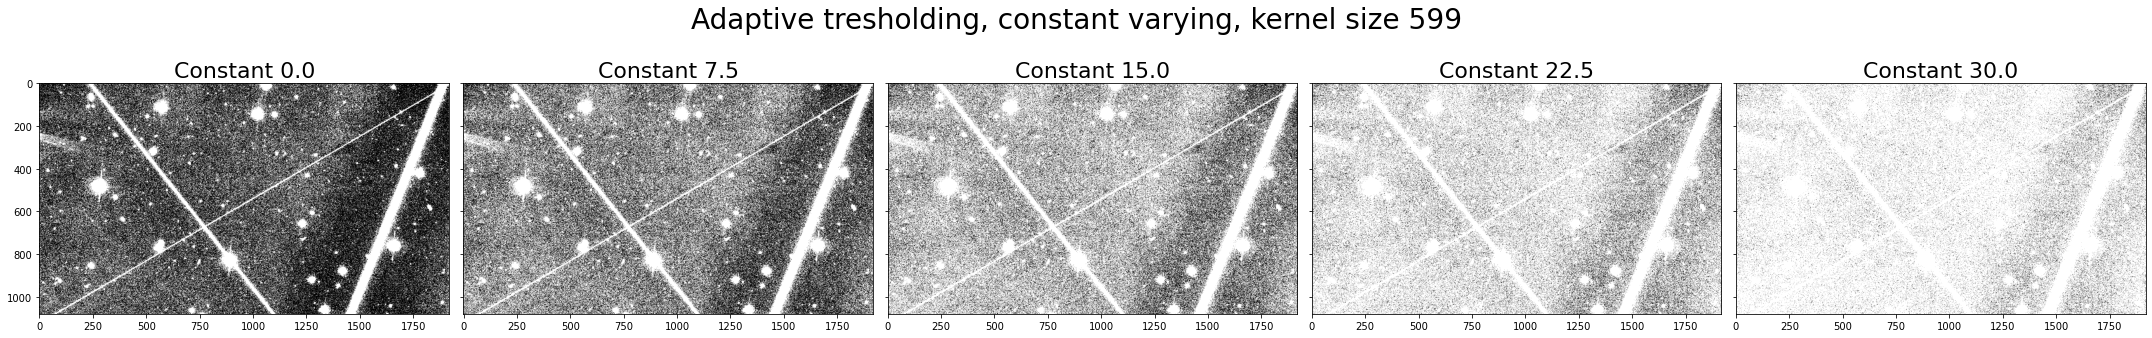

In [146]:
# Adaptive thresholding with a very large kernel but now we change the constant.
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(30, 5))
constant = np.linspace(0, 30, 5)
for ax, i in zip(axes.ravel(), constant):
    th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, 599, i)
    show(th2, ax=ax, cmap="gray", title=f"Constant {i}")
    
fig.suptitle("Adaptive tresholding, constant varying, kernel size 599", fontsize=28)
plt.tight_layout()

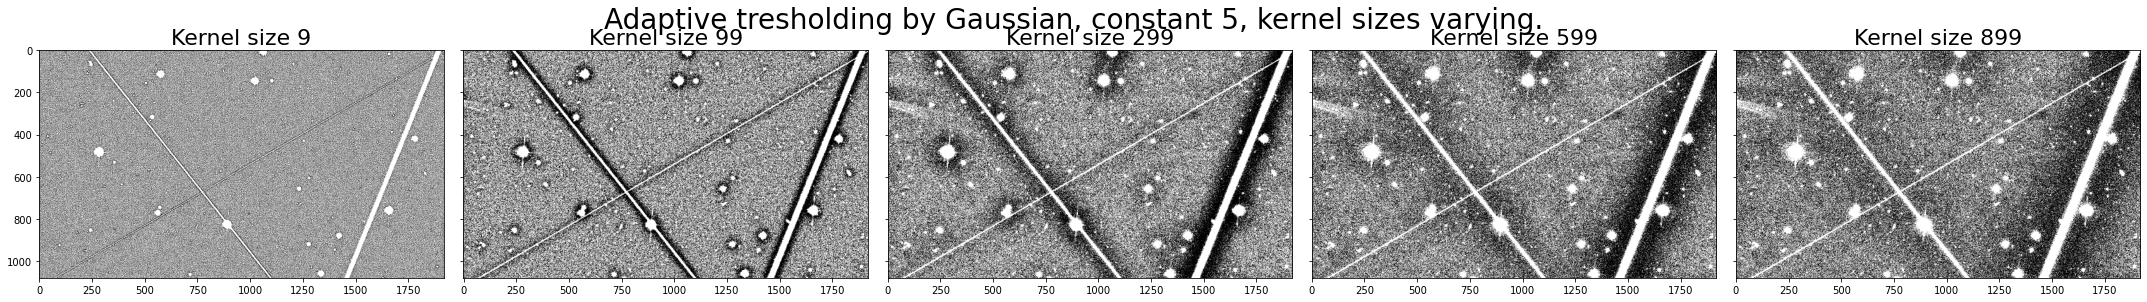

In [147]:
# Adaptive thresholding by mean value, first by kernel size.
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(30, 4))
kernel_sizes = [9, 99, 299, 599, 899]
for ax, i in zip(axes.ravel(), kernel_sizes):
    th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, i, 5)
    show(th2, ax=ax, cmap="gray", title=f"Kernel size {i}")
fig.suptitle("Adaptive tresholding by Gaussian, constant 5, kernel sizes varying.", fontsize=28)
plt.tight_layout()

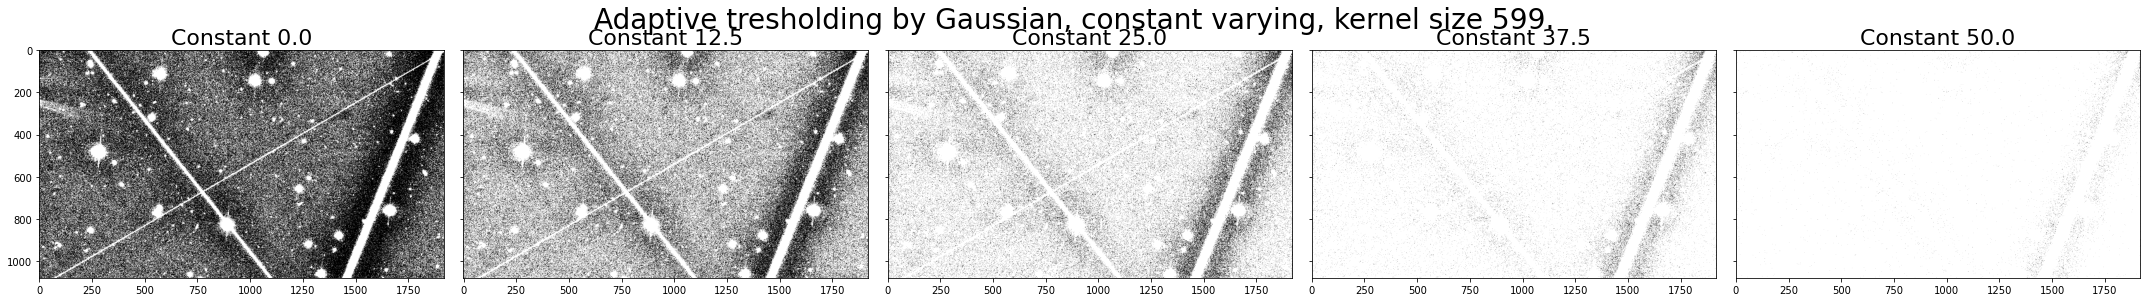

In [148]:
# Adaptive thresholding with a very large kernel but now we change the constant.
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(30, 4))
constant = np.linspace(0, 50, 5)
for ax, i in zip(axes.ravel(), constant):
    th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 599, i)
    show(th3, ax=ax, cmap="gray", title=f"Constant {i}")
    
fig.suptitle("Adaptive tresholding by Gaussian, constant varying, kernel size 599.", fontsize=28)
plt.tight_layout()

What can we conclude?       
What is tresholding good for?
How is it useful for us?

What is the best result we can achieve using tresholding only? Remember a lot of white does not need to be a dissadvantage if we do not interfere with the objects we are interested in! 

The last OpenCV tresholding function is so called Binary Otsu's algorithm. It's like a "normal/basic" threshold we have seen above, but instead of having to manually chose the treshold value an algorithm decides what that value is.

Otsu's algorithm works great when you have two distinct peaks in the histogram, for example buildings against dark skies - or really bright trails on a dark night sky.

<AxesSubplot:title={'center':"Otsu's Algorithm"}>

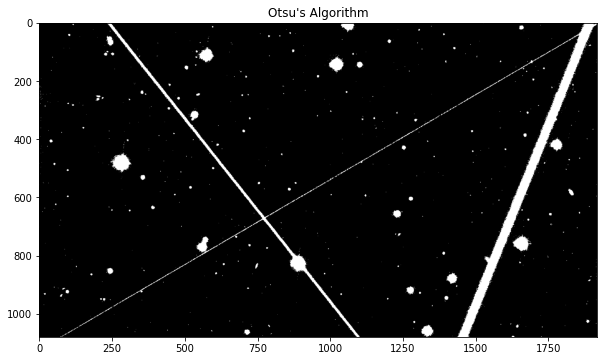

In [139]:
ret2,th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show(th2, title="Otsu's Algorithm", cmap="gray")

## Histogram equalization

In the intro I've described how a histogram of a low-contrast image is mostly concentrated around a small set of values. 

"Stretching" this histogram tends to add "contrast" to the image. Contrastm in this context, means there is a bigger difference between black and white values.          
We would percieve, by eye, more details if we took the values in that image and then equaly distribute them between 0-255.          

And that is precisely what histogram equalization is. It is the process of increasing the contrast of an image. There is not a great advantage to processing astronomical images in this way, because you risk confusing your noise for your signal and vice-versa.        
Nonetheless, there is one very practical application for it - sometimes you just want to visually inspect the image. 

So why is that a problem? Let's showcase on an actual astronomical image.        
Don't worry if you don't immediately understand what AstroPy or FITS is, we will cover that in a different tutorial.

<AxesSubplot:>

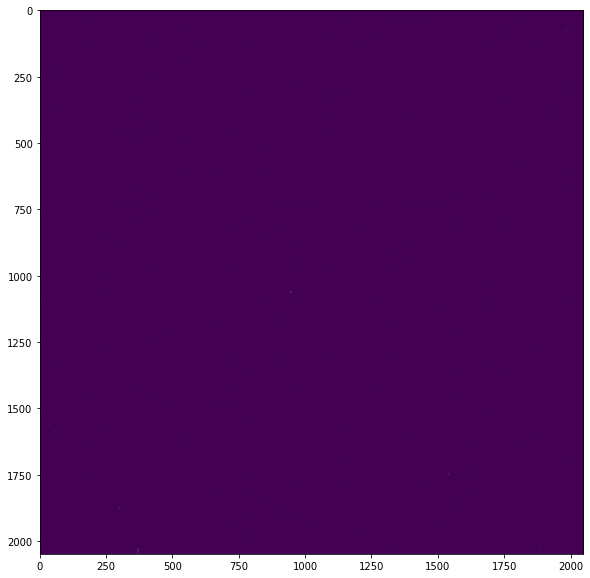

In [155]:
import astropy.io.fits as fitsio

hdulist = fitsio.open("images/bi327715.fits")
img = hdulist[0].data
show(img)

Ok, apparently our image contains no data?       
Let's investigate closer:

In [156]:
print("shape     ", img.shape)
print("data type ", img.dtype)
print("max       ", img.max())
print("min       ", img.min())
print("mean      ", img.mean())
print("Image element: ", img[0, 0])

shape      (2048, 2048)
data type  >f4
max        886980.9
min        -920.2903
mean       501.09445
Image element:  462.33945


Interesting! 

Well maybe not so much since I have already previously hinted that `uint8` type really is all about displaying images on screens for our eyes and that we shouldn't be surprised to find a larger dynamic range of values in scientific data; after all we do want to maintain the precision of our measurements. 

In astronomy, most often, we use `float` type of varying precision. In this case it's `float32` bit type (since it has 4 bytes, each has 8 bits).

So why is that a problem?          
Take a look at the histogram if you can't figure it out. Think about what needs to be done to the values in our image to fit them into a `uint8` type and what happens when we do that without thinking a little more carefully about how to do that properly.

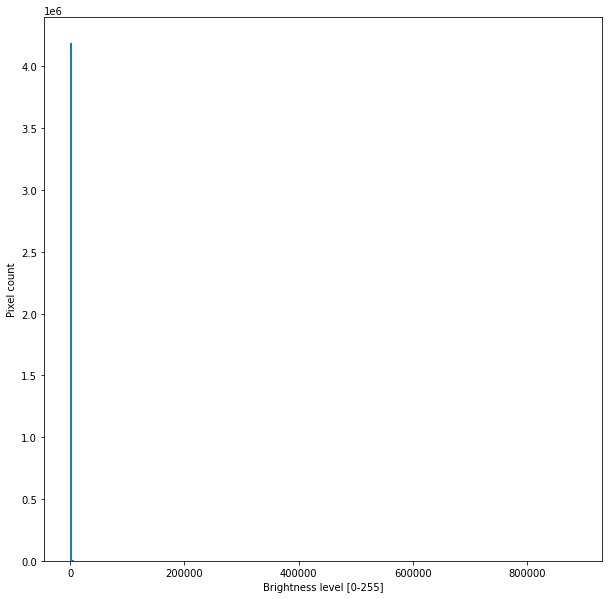

In [158]:
plot_hist(img)

We could attempt to fix this half "by-hand" half by cv2.

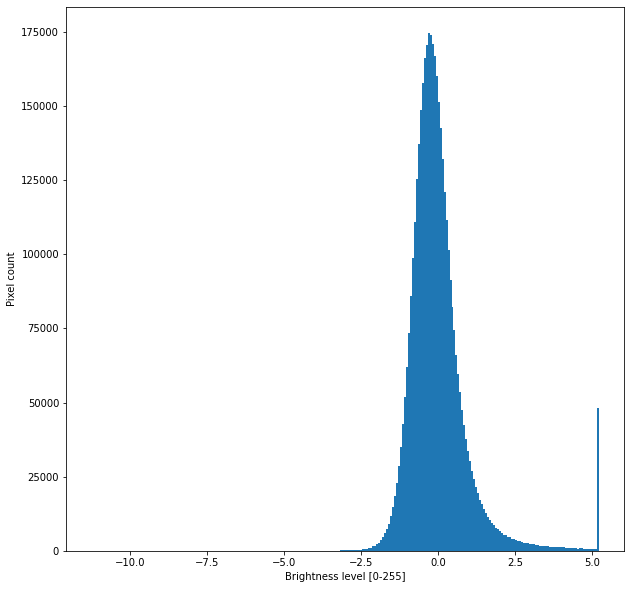

<AxesSubplot:>

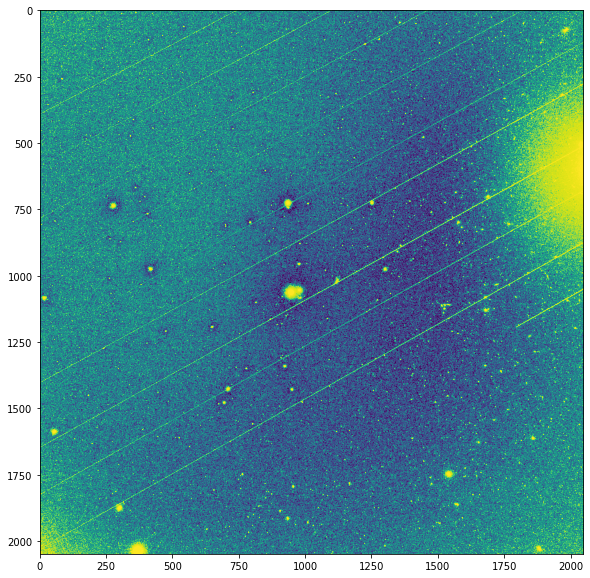

In [214]:
histeq = img.copy()

# The dynamic range in a FITS file is way larger than CV2 was designed 
# to work with, so we need to "normalize" our data a little bit at least.
histeq[histeq > 700] = 700
histeq[histeq < 0] = 0
histeq = (histeq-histeq.mean())/histeq.std()
# now our data looks like this
plot_hist(histeq)

# Secondly, the data now need to be normalized to 0-255 range
# and cast as 8 bit integers before we can work with it in CV2
histeq = cv2.convertScaleAbs(histeq)
histeq = cv2.equalizeHist(histeq)
show(histeq)

This is of course really really annoying to do all the time and the results are not always the best. 

So I want to show you another way - since this is an often used operation the following AstroPy recipe will come in useful in the future.    
The following code will take noticeably longer to run, but it will produce a much better visual representation of the FITS image. It pays off to have a quick look at the documentation because there are many many different "stretch" functions that one could use to normalize the histogram, each producing results with different goals in mind. For example, sometimes you don't want to see the details in a galaxy center, but do want to focus on dim areas around it or vice-versa.

https://docs.astropy.org/en/stable/visualization/normalization.html

<AxesSubplot:>

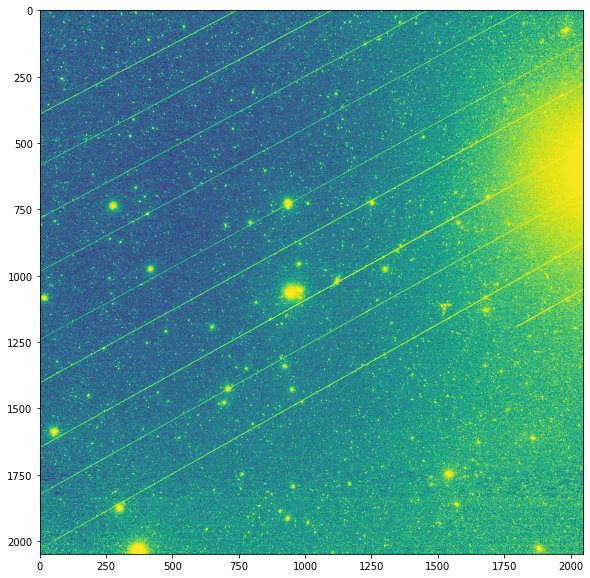

In [215]:
import astropy.visualization as aviz

stretch = aviz.HistEqStretch(image)
norm = aviz.ImageNormalize(image, stretch=stretch, clip=True)
histeq = norm(img)
show(histeq)

Check out what a good job AstroPy does with histogram equalization!

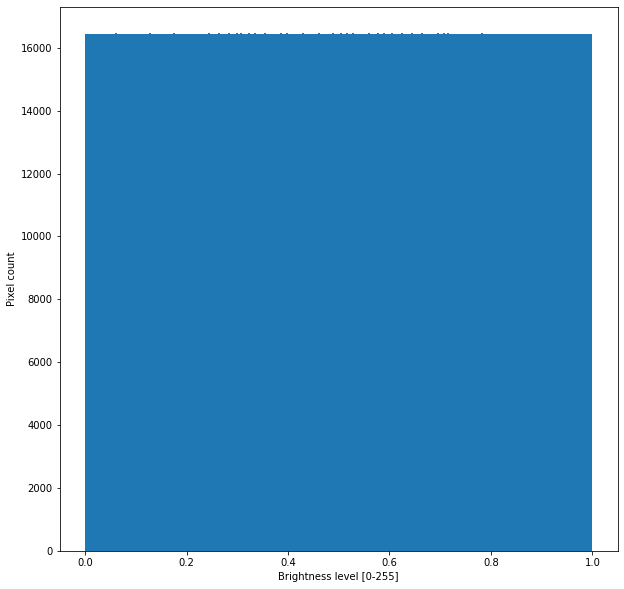

In [216]:
plot_hist(histeq)

# Summary

* Histograms are good tools to get a quick overview of the kind of data that is present in your image
* We can use histograms to select pixels of interest
  * perhaps we are interested in features thatbrightness are significantly brighter than the average pixel brightness in the image?
  * Tresholding is one way to perform this selection and it can come in many forms:
    * global - user-set threshold applies to the whole image
    * local - the treshold is calculated by looking at neighbouring pixels. That neighbourhood can be a rectangular area around our pixel, or some smooth kernel that down-weighs pixels at the edges (makes far-away pixels matter less)
* We are again reminded that we can not blindly believe what we display as our image
  * Science images have a large dynamic range that we need to first transform to 0-255 domain
  * Doing this in a way that maximizes contrast, the spread of the histogram, is called histogram equalization